# Identifying Disease Outbreaks

## Discovering Pandemics Worldwide

__Objective__: Identify pandemics by analyzing anomalies in the clusters of headlines. Look at the prevalence of disease in each cluster. Any disease outbreaks in the United States or around the world will be reported back to superiors at the WHO to direct help where it’s needed. 

__Workflow__:

1.	Download the Diseases database from Stanford University
    -	https://snap.stanford.edu/biodata/datasets/10021/10021-D-DoMiner.html
2.	From the diseases dataset build a list of diseases 
    -	The dataset contains synomyms which should be included in the list.
    -	Some diseases are expressed with their scientific names, and you should change them with the terminology used by a newspaper.
3.	Organize the headlines by cluster so you can correctly identify diseases in each region
4.	For each disease contained in each headline for each world region (according to your clustering solution) count the frequency of each disease
5.	The number of headlines and, consequently, the number of diseases will vary in each region.
    -	Normalize the frequencies so they can be comparable.
6.	Identify the outbreak by using any of the outlier detection technique you have learned in this program.
7.  Present your result with the support of maps and text    

## 1. Download the Diseases Dataset
https://snap.stanford.edu/biodata/datasets/10021/10021-D-DoMiner.html

This is a gz file which you can uncompress using any zip utility. You can find the 7-Zip utility at https://www.7-zip.org/download.html if needed.

## 2. From the diseases dataset build a list of diseases 
    -	The dataset contains synomyms which should be included in the list.
    -	Some diseases are expressed with their scientific names, and you should change them with the terminology used by a newspaper.

In [40]:
import pandas as pd

# Read Headline data and diseases
data_path = "/Users/chen/Desktop/project3/processed_headlines_clustered.csv"
disease_path = "/Users/chen/Desktop/project3/D-DoMiner_miner-diseaseDOID.tsv"

data = pd.read_csv(data_path)
diseases = pd.read_csv(disease_path, sep='\t')

# Get the disease names and synonyms and build a list object
#    - I recommend to turn the disease names to lowercase
#    - Do not forget that the list contains synonyms: add them to the list. 
#      Notice that many of them are nan values, do not forget to remove them
#<YOUR CODE HERE>
diseases = diseases.dropna()
diseases = diseases.drop_duplicates()
diseases.tail()


,# Disease(DOID),Name,Definition,Synonym
9194,DOID:9909,hordeolum,Hordeolum is a sequelae of infectious and para...,Stye EXACT [MTHICD9_2006:373.11]
9208,DOID:9931,Waterhouse-Friderichsen syndrome,An adrenal gland disease that is characterized...,WFS EXACT []
9220,DOID:9952,acute lymphocytic leukemia,A lymphoblastic leukemia that is characterized...,acute lymphoblastic leukemia EXACT []
9226,DOID:9965,toxoplasmosis,A coccidiosis that has_material_basis_in proto...,disseminated toxoplasmosis EXACT []
9241,DOID:9988,tertiary neurosyphilis,A tertiary syphilis that results_in infection ...,late neurosyphilis EXACT []


In [41]:
name=list(diseases.Name)
synonym = list(diseases.Synonym)
description = dict(zip(name,synonym))
disease_list= list(description.items())

## 3.	Organize the headlines by cluster 
Organize the headlines by cluster so you can correctly identify diseases in each region

In [42]:
data.head()

,Unnamed: 0,headline,city,accented_city,name,latitude,longitude,countrycode,pop,cluster,x,y
0,0,Zika Outbreak Hits Miami,Miami,Miami,Miami,25.77427,-80.19366,US,441003.0,0,-80.19366,25.77427
1,1,Could Zika Reach New York City?,New York City,New York City,New York City,40.71427,-74.00597,US,8175133.0,0,-74.00597,40.71427
2,2,First Case of Zika in Miami Beach,Miami,Miami,Miami,25.77427,-80.19366,US,441003.0,0,-80.19366,25.77427
3,3,"Mystery Virus Spreads in Recife, Brazil",Recife,Recife,Recife,-8.05389,-34.88111,BR,1478098.0,1,-34.88111,-8.05389
4,4,Dallas man comes down with case of Zika,Dallas,Dallas,Dallas,32.78306,-96.80667,US,1300092.0,0,-96.80667,32.78306


In [43]:
# Group headlines by cluster
data = data.sort_values(by='cluster', ascending=True)
data.head()

,Unnamed: 0,headline,city,accented_city,name,latitude,longitude,countrycode,pop,cluster,x,y
231,242,Authorities are Worried about the Spread of No...,Dubai,Dubai,Dubai,25.07725,55.30927,AE,2956587.0,-1,55.30927,25.07725
488,521,New medicine wipes out HIV in Kihei,Kihei,Kīhei,Kīhei,20.76462,-156.44578,US,20881.0,-1,-156.44578,20.76462
137,145,Zika alert for Rio Grande Valley residents,Rio Grande,Río Grande,Río Grande,-53.78769,-67.70946,AR,52681.0,-1,-67.70946,-53.78769
276,292,More people in Saint Petersburg are infected w...,Saint Petersburg,Saint Petersburg,Saint Petersburg,59.93863,30.31413,RU,5028000.0,-1,30.31413,59.93863
214,223,Rumors about Hepatitis D spreading in Albany h...,Albany,Albany,Albany,-35.02692,117.88369,AU,33650.0,-1,117.88369,-35.02692


In [44]:
import re
import unidecode
cleaneddata = [unidecode.unidecode(headline) for headline in data['headline']]

In [12]:
# create the list of diseases
names = [ name.lower() for name in name ]
# Build your regular expression with the disease names
escaped = map(re.escape, names)
disease_regex = re.compile(r'\b%s\b' % '\\b|\\b'.join(escaped), re.I)
# Check you are able to recognize diseases
for test_disease_headline in cleaneddata:
    print(test_disease_headline)
    disease_match = re.search(disease_regex, test_disease_headline)
    if disease_match:
        print(disease_match.group(), "\n")
    else:
        print(None)

Zika Outbreak Hits Miami
None
Fort Hood Reports its First Zika Patient
None
Ogden is infested with Gonorrhea
Gonorrhea 

Zika spreads to Lewisville
None
More Zika patients reported in Fort Myers
None
Zika symptoms spotted in Bonita Springs
None
Kent is infested with Rabies
Rabies 

Herpes Vaccine is now Required in Mattoon
None
Zika Troubles come to La Libertad
None
West Nile Virus Exposure in Alpharetta
None
The Spread of Hepatitis E in Lansing has been Confirmed
None
West Nile Virus Exposure in Racine
None
Zika symptoms spotted in Iquitos
None
More Zika patients reported in Carrollton
None
Norwalk Encounters Severe Symptoms of Malaria
Malaria 

Case of Measles Reported in Springdale
Measles 

The Spread of Meningitis in Imperial has been Confirmed
None
Chickenpox Comes to Stillwater
Chickenpox 

Schools in Huntington Closed Due to Rotavirus Outbreak
None
Rumors about Hepatitis D Spreading in Montreal have been Refuted
Hepatitis D 

Zika symptoms spotted in Quisqueya
None
Erie County 

None
Jacksonville man hit by Zika
None
Caracas patient dies
None
Authorities are Worried about the Spread of Bronchitis in Silver Spring
Bronchitis 

Hillsborough uses innovative trap against Zika 20 minutes ago
None
Manhattan Residents Recieve HIV vaccine
None
Belize City under threat from Zika
None
More Zika cases in Soyapango
None
Varicella Keeps Spreading in Detroit
None
Gainesville Deals with Disease Concerns
None
Cancun hit by Outbreak of Party Fever!
None
Hepatitis B Vaccine is now Required in Quebec
Hepatitis B 

Madison lab developing vaccine against Zika virus [The Wisconsin State Journal]
None
New medicine wipes out Chikungunya in Tucson
Chikungunya 

Urbana Encounters Severe Symptoms of Meningitis
None
Zika Virus Transmission Detected in Havana
None
Zika Arrives in North Miami
None
Zika symtomps spotted in Key West
None
Syphilis Outbreak in Harrisburg
Syphilis 

Case of Measles Reported in Vancouver
Measles 

Zika arrives in San Benito
None
Is Lafayette prepared to combat Z

Hepatitis D 

West Nile Virus Symptoms Spread all over Yerevan
None
Rumors about HIV spreading in Montpellier have been refuted
None
Tuberculosis re-emerges in Silver Springs
Tuberculosis 

Mecca tests new cure for Chikungunya
Chikungunya 

More contaminated cattle reported in Bedford
None
Spike of Norovirus Cases in Huddersfield
None
Spike of Dengue Cases in Stockholm
None
Spanish Flu Outbreak in Barcelona
None
Will MCD vaccine help Strasbourg?
None
Duisburg up in Arms over Mad Cow Disease
None
Hepatitis A re-emerges in Stamford
Hepatitis A 

Will Mad Cow Vaccine Help Bristol?
None
Arhus is infested with Bronchitis
Bronchitis 

Pilsen Encounters Severe Symptoms of Malaria
Malaria 

Will Rabies vaccine help Tangier?
Rabies 

Rhinovirus has Arrived in Athens
None
Southampton Patient in Critical Condition after Contracting Tuberculosis
Tuberculosis 

Hepatitis B has not Left Florence
Hepatitis B 

Mad Cow Outbreak Spreading in Ennis
None
More Patients in Stuttgart are Getting Diagnosed w

In [13]:
'chickenpox' in names

True

In [14]:
# create a function to generate disease in each headline
def generate_disease(cleaneddata):
    escaped = map(re.escape, names)
    disease_regex = re.compile(r'\b%s\b' % '\\b|\\b'.join(escaped), re.I)
    disease_match = re.search(disease_regex, cleaneddata)
    if disease_match:
        disease = disease_match.group()
    else:
        disease = None
    return dict(headline=cleaneddata,disease=disease)

In [45]:
generate_disease(cleaneddata[22])

{'headline': 'West Nile Virus Exposure in Alpharetta', 'disease': None}

In [46]:
# get the list of dictionaries of all headlines
headline_disease= [
   generate_disease(headline) for headline in cleaneddata
]
# testing
headline_disease[:10]

[{'headline': 'Authorities are Worried about the Spread of Norovirus in Dubai',
  'disease': None},
 {'headline': 'New medicine wipes out HIV in Kihei', 'disease': None},
 {'headline': 'Zika alert for Rio Grande Valley residents', 'disease': None},
 {'headline': 'More people in Saint Petersburg are infected with Varicella every year',
  'disease': None},
 {'headline': 'Rumors about Hepatitis D spreading in Albany have been refuted',
  'disease': 'Hepatitis D'},
 {'headline': 'Zika Outbreak in Manaus', 'disease': None},
 {'headline': 'Albany Residents Recieve Respiratory Syncytial Virus vaccine',
  'disease': None},
 {'headline': 'Measles Vaccine is now Required in Wailuku',
  'disease': 'Measles'},
 {'headline': 'Is Zika virus in Majuro?', 'disease': None},
 {'headline': 'Rabies Exposure in Hamilton', 'disease': 'Rabies'}]

In [47]:
import json

save_file = "/Users/chen/Desktop/project3/headline_disease.json"
with open(save_file, "w") as fout:
    fout.write(json.dumps(headline_disease))

In [48]:
import pandas as pd
import numpy as np
df = pd.read_json("/Users/chen/Desktop/project3/headline_disease.json")
df = df.replace({None: np.nan})
df

,headline,disease
0,Authorities are Worried about the Spread of No...,NaN
1,New medicine wipes out HIV in Kihei,NaN
2,Zika alert for Rio Grande Valley residents,NaN
3,More people in Saint Petersburg are infected w...,NaN
4,Rumors about Hepatitis D spreading in Albany h...,Hepatitis D
5,Zika Outbreak in Manaus,NaN
6,Albany Residents Recieve Respiratory Syncytial...,NaN
7,Measles Vaccine is now Required in Wailuku,Measles
8,Is Zika virus in Majuro?,NaN
9,Rabies Exposure in Hamilton,Rabies


In [49]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 605 entries, 231 to 602
Data columns (total 12 columns):
Unnamed: 0       605 non-null int64
headline         605 non-null object
city             605 non-null object
accented_city    605 non-null object
name             605 non-null object
latitude         605 non-null float64
longitude        605 non-null float64
countrycode      605 non-null object
pop              605 non-null float64
cluster          605 non-null int64
x                605 non-null float64
y                605 non-null float64
dtypes: float64(5), int64(2), object(5)
memory usage: 61.4+ KB


In [57]:
#merge the new dataframe with the original dataframe
data = pd.merge(data,df,how = 'left')
# showing the merged dataframe
data.info()


<class 'pandas.core.frame.DataFrame'>
Int64Index: 184 entries, 0 to 183
Data columns (total 13 columns):
Unnamed: 0       184 non-null int64
headline         184 non-null object
city             184 non-null object
accented_city    184 non-null object
name             184 non-null object
latitude         184 non-null float64
longitude        184 non-null float64
countrycode      184 non-null object
pop              184 non-null float64
cluster          184 non-null int64
x                184 non-null float64
y                184 non-null float64
disease          184 non-null object
dtypes: float64(5), int64(2), object(6)
memory usage: 20.1+ KB


## 4. For each disease contained in each headline for each world region (according to your clustering solution) count the frequency of each disease
    - Count each disease from the headlines for each region

In [54]:
# <YOUR CODE HERE>
_=data['cluster'].groupby(data['disease']).value_counts()
_

disease       cluster
Bronchitis    0          3
              2          3
              1          1
              4          1
              5          1
                        ..
Tuberculosis  2          3
              4          2
              3          1
              5          1
              6          1
Name: cluster, Length: 64, dtype: int64

## 5. The number of headlines and, consequently, the number of diseases will vary in each region.
    - Normalize the frequencies so they can be compared.
    - In order to find diseases from the headlines you can use the same technique you used to match cities.

In [56]:
# Extract the normalized count of the number of diseases in the headlines for each region
#<YOUR CODE HERE>
data = data.dropna()
data['disease'].groupby(data['cluster']).value_counts()

cluster  disease     
-1       Hepatitis D     2
         Measles         2
         Influenza       1
         Lung Cancer     1
         Rabies          1
                        ..
 5       Chickenpox      2
         Bronchitis      1
         Tuberculosis    1
 6       Measles         1
         Tuberculosis    1
Name: disease, Length: 64, dtype: int64

## 6. Identify the outbreak by using any of the outlier detection technique you have learned in this program.
Using any outlier detection method you have learned in this program, apply it to the normalized count of diseases for each region and detect any anomaly for any disease in the headlines.

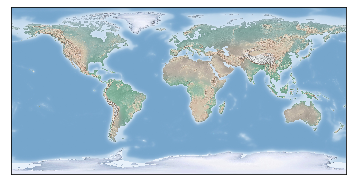

In [22]:
from mpl_toolkits.basemap import Basemap
import matplotlib.pyplot as plt

plt.rcParams['font.size'] = 18

%matplotlib inline

# Simple world map
m = Basemap()
_ = m.shadedrelief()

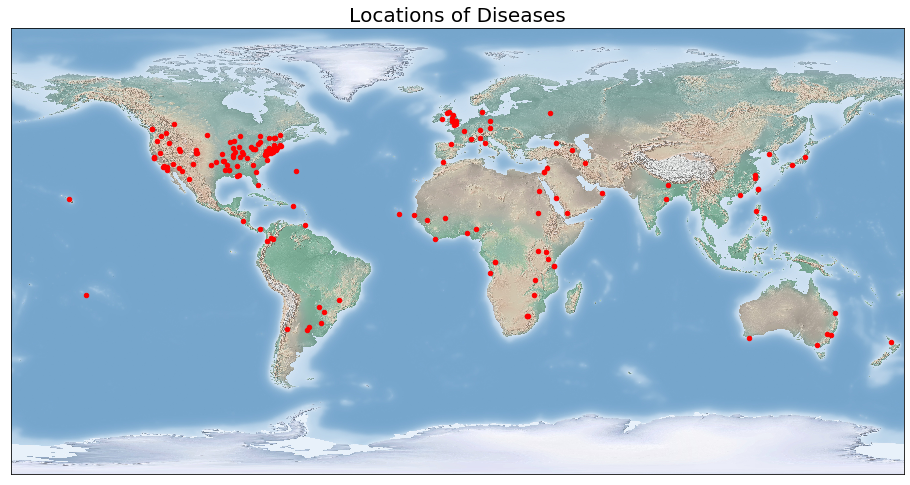

In [58]:
import matplotlib.pyplot as plt

# Make an empty figure
plt.figure(figsize=(16, 10))

# Convert the longitude, latitude to map projection coordinates
x, y = m(x=data["longitude"], y=data["latitude"])

m.shadedrelief()

# Plot the headline locations
plt.scatter(x, y, 20, color="red")

# Grab the current axis to set the title (gca)
ax = plt.gca()
_ = ax.set_title("Locations of Diseases", size=20)

## Present your result with the support of maps and text

In [ ]:
<YOUR FINAL REPORT HERE>